## 3.2. Modelos Estatísticos para Séries Temporais

Analisaremos os seguintes modelos específicos:

**- Modelos autorregressivos (AR), modelos autorregressivos de média móvel (ARMA) e modelos autorregressivos integrados de média móvel (ARIMA)** <br>
**- Autorregressão vetorial (VAR)** <br>
**- Modelos hieráquicos** <br>



<font color='red'>**Importante!**

**Por que não usar regressão linear?** A **regressão linear presume que os dados sejam independentes e identicamente distribuídos (iid)**. Isso não ocorre tão comumente em séries temporais porque os pontos próximos no tempo **costumam estar fortemente relacionados uns com os outros**. Na verdade, **quando não há correlações temporais, não se pode utilizar a série temporal para predizer o futuro ou compreender a dinâmica temporal**. <br>

**Para que a regressão linear possa ser aplicada a uma série temporal é necessário que as seguintes condições sejam atendidas:**<br>

- A série temporal tem uma resposta linear aos seus preditores;<br>
- Nenhuma variável de entrada é constante ao longo do tempo ou perfeitamente correlacionada com outra variável de entrada;<br>
- O valor esperado do erro deve ser sempre 0; <br>
- Não deve existir correlação entre os erros; <br>
- A variância do erro independe do tempo. <br>

**Se essas suposições forem válidas o método de regressão dos mínimos quadrados ordinários** é um estimador não viesado do coeficientes dados às entradas, mesmo para dados de séries temporais. **Porém se não forem válidas e você utilizar uma regressão linear em uma série temporal que não atenda às suposições acima:**<br>

- Seus coeficientes não minimizarão o erro do seu modelo;<br>
- Seus *p-valores* na avaliação de significância estatística em um teste provavelmente esterá incorreto.

Para calcular **MA, AR, ARMA** e **ARIMA** vamos usar a mesma função **ARIMA** de **statsmodels**, uma vez que: <br>

**ARIMA(p,q,d)**<br>
**AR(p) = ARIMA(p,0,0)** <br>
**MA(q) = ARIMA(0,0,q)** <br>
**ARMA(p,q) = ARIMA(p,0,q)**

**OBS:** p, q e d são os hiperparâmetros do modelo.

## Introdução

Vamos começar explorando a função **ARIMA** plotando diferentes gráficos conforme a alteração dos **hiperparâmetros**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
from functools import reduce
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

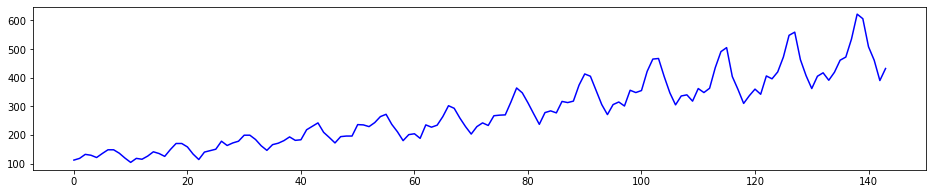

In [5]:
df = pd.read_csv('AirPassengers2.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
plt.figure(figsize= (16, 3))
plt.plot(df['Passengers'], 'b-')
plt.show()

In [6]:
train_data = df['Passengers'][:len(df)-100]
test_data = df['Passengers'][len(df)-100:]

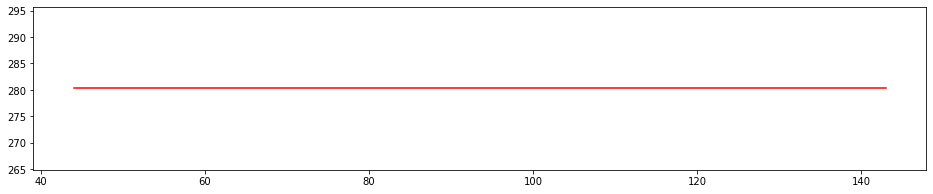

In [7]:
#Veja o que acontece quanto setamos os hiperparâmetros todos como zero:
model = ARIMA(df['Passengers'], order=(0,0, 0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r')
plt.show()

**ARIMA(0,0,0) é um modelo de ruído branco**

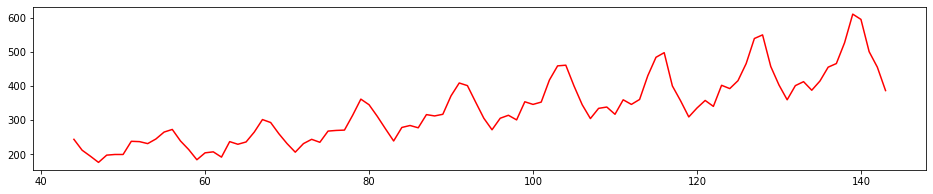

In [10]:
#Agora perceba o comportamento do modelo quando definimos o hiperparâmetro p:
model = ARIMA(df['Passengers'], order=(1,0, 0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r-')
plt.show()

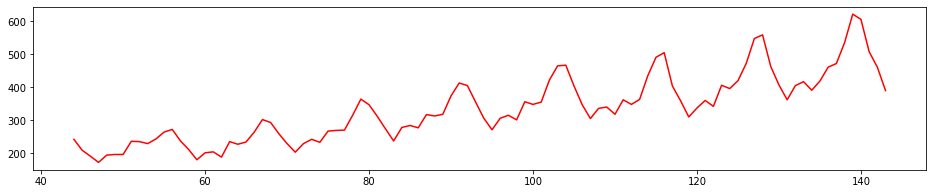

In [9]:
#Agora perceba o comportamento do modelo quando definimos o hiperparâmetro d:
model = ARIMA(df['Passengers'], order=(0,1, 0))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r-')
plt.show()

**O exemplo acima é uma ARIMA(0,1,0) é um passeio aleatório com um drift (deslocamento). <br>
Um modelo ARIMA(0,1,0) com constante zero seria apenas um passeio aleatório.**

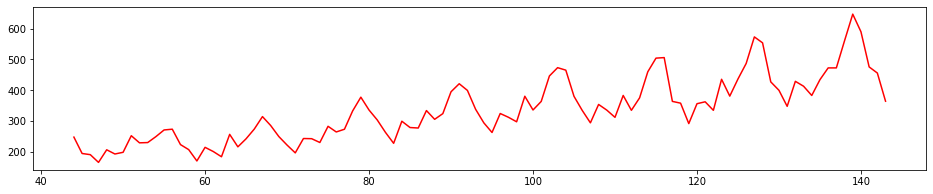

In [11]:
#Agora perceba o comportamento do modelo quando definimos o hiperparâmetro d e q como 1:
model = ARIMA(df['Passengers'], order=(0,1, 1))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r-')
plt.show()

**ARIMA(0,1,1) é um modelo de suavização exponencial.** <br>

**ARIMA(0,2,1) ou ARIMA(0,2,2) sem constante aplica a suavização exponencial**

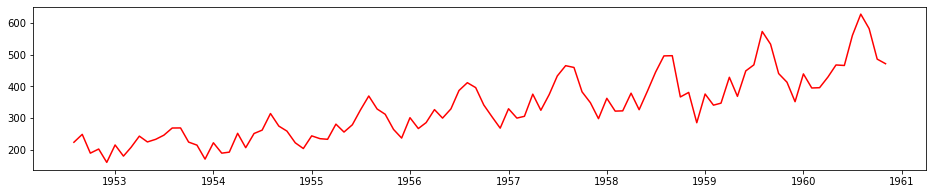

In [181]:
#Suavização exponencial:
model = ARIMA(df['Passengers'], order=(0,1, 2))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r-')
plt.show()

## Identificando comportamento da série

In [13]:
df = df.set_index('Date')
df

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 432x288 with 0 Axes>

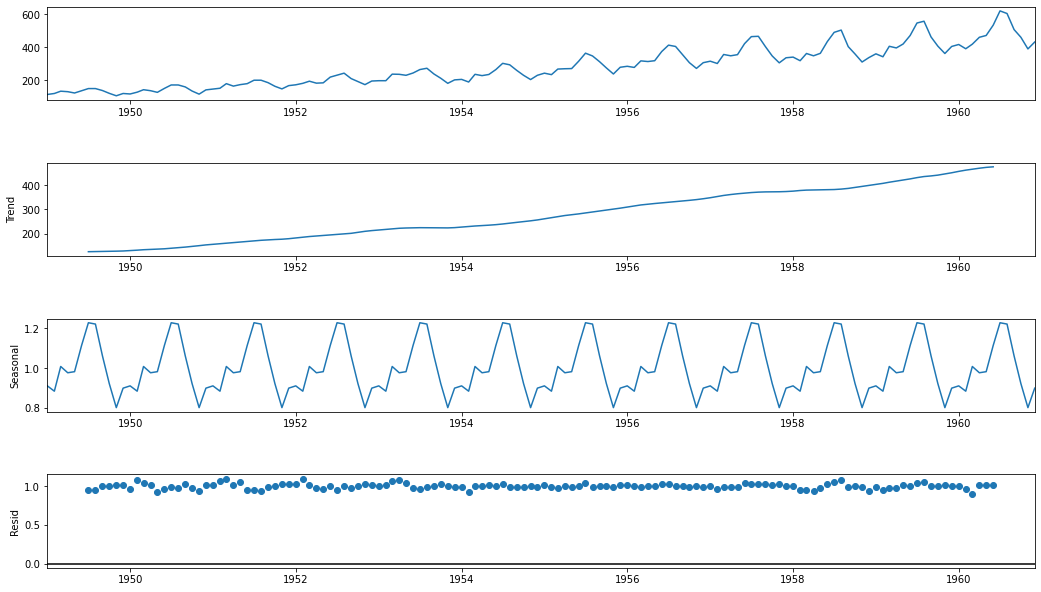

In [14]:
#Error-Trend-Seasonality (ETS)
decompose_result_mult = seasonal_decompose(df, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

fig = plt.figure()  
fig = decompose_result_mult.plot()  
fig.set_size_inches(16, 9)

## 3.2.1. Modelo autorregressivo (AR)

O modelo autorregressivo toma como base a intuição de que o passado prediz o futuro. 

Teremos um modelo **AR(p)** onde **p** é o parâmetro de **intervalo de tempo** em que os pontos tendem a apresentar correlação.

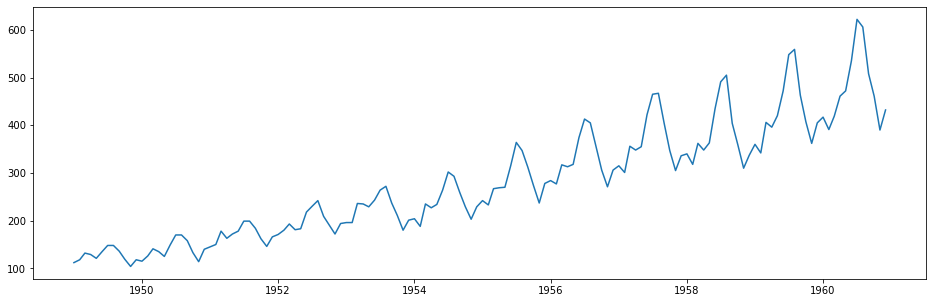

In [68]:
plt.figure(figsize= (16, 5))
plt.plot(df['Passengers'])
plt.show()

C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 1152x360 with 0 Axes>

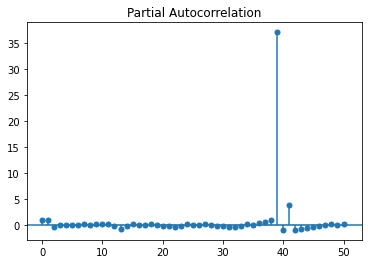

In [108]:
#Autocorrelação Parcial
plot_pacf(df['Passengers'], lags = 50)
plt.show()

In [71]:
train_data = df['Passengers'][:30]
test_data = df['Passengers'][30:]

In [182]:
model = ARIMA(train_data, order=(13,0, 0))
model_fit = model.fit()

In [183]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
predictions

1952-09-01    244.553984
1952-10-01    240.589595
1952-11-01    240.589595
1952-12-01    240.589595
1953-01-01    240.589595
                 ...    
1960-08-01    240.589595
1960-09-01    240.589595
1960-10-01    240.589595
1960-11-01    240.589595
1960-12-01    240.589595
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

In [184]:
df_predictions = pd.DataFrame({'Predictions': predictions})

In [185]:
results = pd.merge(df, df_predictions, left_index=True, right_index=True)

In [186]:
results.head()

,Passengers,Predictions
1952-09-01,209,244.553984
1952-10-01,191,240.589595
1952-11-01,172,240.589595
1952-12-01,194,240.589595
1953-01-01,196,240.589595


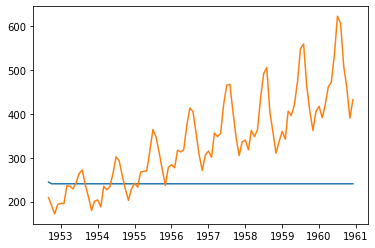

In [187]:
plt.plot(results[['Predictions','Passengers']])

In [107]:
results.corr()

,Passengers,Predictions
Passengers,1.000000,0.059139
Predictions,0.059139,1.000000


## 3.2.2. Modelo com Média Móvel (MA)

Teremos um modelo **MA(q)** onde q é o parâmetro de intervalo de tempo do qual se calcula a média.

In [139]:
model = ARIMA(train_data, order=(0,0, 40))
model_fit = model.fit()

C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting param

In [140]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
predictions

1951-07-01    166.747782
1951-08-01    158.734520
1951-09-01    141.421585
1951-10-01    125.992860
1951-11-01    130.104458
                 ...    
1960-08-01    139.912196
1960-09-01    139.912196
1960-10-01    139.912196
1960-11-01    139.912196
1960-12-01    139.912196
Freq: MS, Name: predicted_mean, Length: 114, dtype: float64

In [141]:
df_predictions = pd.DataFrame({'Predictions': predictions})

In [142]:
results = pd.merge(df, df_predictions, left_index=True, right_index=True)

In [143]:
results

,Passengers,Predictions
1951-07-01,199,166.747782
1951-08-01,199,158.734520
1951-09-01,184,141.421585
1951-10-01,162,125.992860
1951-11-01,146,130.104458
...,...,...
1960-08-01,606,139.912196
1960-09-01,508,139.912196
1960-10-01,461,139.912196
1960-11-01,390,139.912196


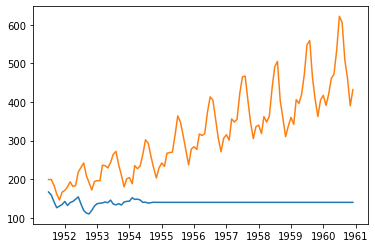

In [144]:
plt.plot(results[['Predictions','Passengers']])

In [145]:
results.corr()

,Passengers,Predictions
Passengers,1.000000,0.098469
Predictions,0.098469,1.000000


Verifica-se que o modelo de média móvel não traz uma boa estimativa de forecasting para o período considerado.

## 3.2.3. Modelo autorregressivo com média móvel (ARMA)

**ARMA(p,q)** é equivalente a **ARIMA(p,0,q)**

Autorregressão com Média Móvel é uma combinação dos modelos **AR(p)** e **MA(q)**.

In [153]:
model = ARIMA(train_data, order=(5,0, 40))
model_fit = model.fit()

C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting param

In [154]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
predictions

1951-07-01    148.807106
1951-08-01    135.913825
1951-09-01    114.871702
1951-10-01     94.021705
1951-11-01    128.340108
                 ...    
1960-08-01    138.468787
1960-09-01    140.060780
1960-10-01    136.447875
1960-11-01    133.053880
1960-12-01    133.475664
Freq: MS, Name: predicted_mean, Length: 114, dtype: float64

In [155]:
df_predictions = pd.DataFrame({'Predictions': predictions})

In [156]:
results_arma = pd.merge(df, df_predictions, left_index=True, right_index=True)

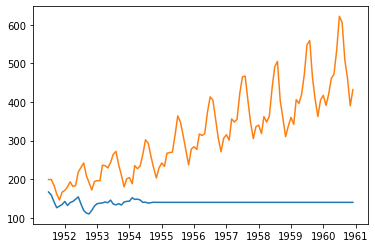

In [157]:
plt.plot(results[['Predictions','Passengers']])

In [158]:
results_arma.corr()

,Passengers,Predictions
Passengers,1.000000,-0.006923
Predictions,-0.006923,1.000000


Verifique que o **ARMA(15,8)** melhora ligeiramente a estimativa por **AR(15)** e **MA(8)**.

## 3.2.4. Modelo autorregressivo integrado de média móvel (ARIMA)

**ARIMA(p,d,q)**, onde **q** é o hiperparâmetro que indica quantas vezes a série temporal modelada deve ser diferenciada para gerar a estacionariedade. <br>

**Observação:** em geral, espera-se que o valor de **d** estejam entre **0 e 2**. 

In [441]:
df = pd.read_csv('opsd_germany_daily.csv')
df = df[['Date','Consumption']]
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Date,Consumption
0,2015-01-01,1111.336
1,2015-01-02,1300.884
2,2015-01-03,1265.271
3,2015-01-04,1198.854
4,2015-01-05,1449.861


In [442]:
train_data = df[1:len(df['Consumption'])-100]
test_data = df[len(df['Consumption'])-100:]

In [448]:
model = ARIMA(train_data['Consumption'], order=(5,2, 2))
model_fit = model.fit()

In [449]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
predictions

996     1180.646665
997     1187.312313
998     1324.326292
999     1424.464884
1000    1439.283766
           ...     
1091    1383.818199
1092    1456.486578
1093    1441.395933
1094    1349.800704
1095    1249.156651
Name: predicted_mean, Length: 100, dtype: float64

In [450]:
df_predictions = pd.DataFrame({'Predictions': predictions})

In [451]:
results_arma = pd.merge(df, df_predictions, left_index=True, right_index=True)

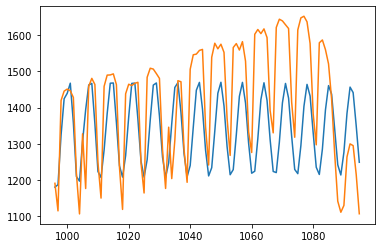

In [452]:
plt.plot(results_arma[['Predictions','Consumption']])

In [453]:
results_arma.corr()

,Consumption,Predictions
Consumption,1.000000,0.527276
Predictions,0.527276,1.000000


**Acima, os hiperparâmetros escolhidos foram p = 5, q = 2 e d = 2.** <br>

Mas, serão de fato os melhores para minimizar o erro das estimativas?

A seguir, vamos utilizar o Akaike’s Information Criterion (**AIC**) e Bayesian Information Criterion (**BIC**) para encontrar os melhores hiperparâmetros. 

## 3.2.7. SARIMA

O modelo **SARIMA** incorpora sazonalidade à série. <br>

Vamos aproveitar o tema para introduzir os métodos **AIC** e **BIC** utilizados para encontrar os melhores hiperparâmetros para um modelo ARIMA em geral. 

## 3.2.7.1. Akaike’s Information Criterion (AIC) e Bayesian Information Criterion (BIC)

In [160]:
df = pd.read_csv('AirPassengers2.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [161]:
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.09 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.26 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 22 Feb 2022   AIC                           1019.178
Time:                                     19:10:40   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [162]:
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          information_criterion='bic',
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize bic
 ARIMA(1,1,1)(0,1,1)[12]             : BIC=1034.397, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1034.383, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=1029.019, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=1029.628, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=1026.144, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=1029.539, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=1031.994, Time=0.15 sec
 ARIMA(2,1,0)(0,1,0)[12]             : BIC=1031.019, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : BIC=1031.019, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1026.389, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : BIC=1029.348, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : BIC=1030.968, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.791 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                            Tue, 22 Feb 2022   AIC                           1020.393
Time:                                    19:10:46   BIC                           1026.144
Sample:                                         0   HQIC                          1022.730
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3076      0.073     -4.186      0.000      -0.452      -0.164
sigma2       137.0108     14.623      9.370      0.000     108.351     165.670
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.75
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**RESULTADO:**

Nos dois testes o melhor modelo indicado é **ARIMA(2,0,2)(2,1,0)[12]**, isto é, um modelo **ARIMA com sazonalidade**, também chamado de **SARIMA**:

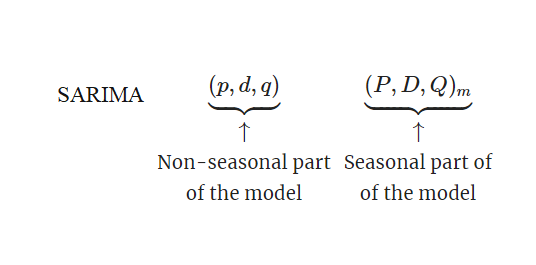

O teste AIC e BIC poderia ter sido abordado no início do capítulo, antes de começarmos as regressões via **AR**, **MA**, **ARMA** e **ARIMA**. Na verdade ele é um dos primeiros steps para construção de um modelo de estimativa para uma série temporal, porque já indica o melhor modelo sem precisarmos testar um a um, como aqui fizemos apenas pelo propósito didático. 

## **3.2.5. Modelo autorregressivo integrado de média móvel e sazonalidade (SARIMA)**

**Como configurar o SARIMA**<br>

A configuração de um SARIMA requer a seleção de hiperparâmetros para os elementos de tendência e sazonal da série.<br>

**Elementos de tendência**<br>
Existem três elementos de tendência que requerem configuração. <br>
São os mesmos do modelo ARIMA; especificamente:<br>

**p**: Ordem de autoregressão de tendência.<br>
**d**: Ordem de diferença de tendência.<br>
**q**: Ordem média móvel de tendência.<br>

**Elementos sazonais**<br>
Existem quatro elementos sazonais que não fazem parte do ARIMA que devem ser configurados; eles estão:<br>

**P**: Ordem autorregressiva sazonal.<br>
**D**: Ordem de diferença sazonal.<br>
**P**: Ordem de média móvel sazonal.<br>
**m**: O número de passos de tempo para um único período sazonal.<br>

In [173]:
df = pd.read_csv('AirPassengers2.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df= df.set_index('Date')

In [174]:
train_data = df[1:len(df['Passengers'])-100]
test_data = df[len(df['Passengers'])-100:]

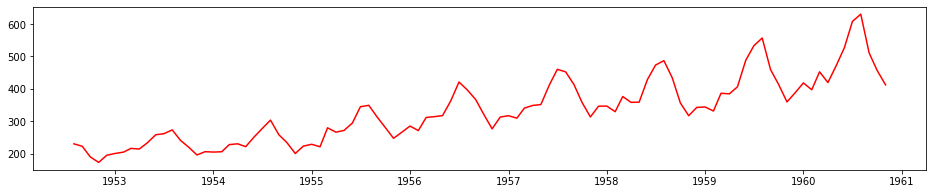

In [175]:
model = SARIMAX(df['Passengers'], order=(0,1, 1), seasonal_order= (2, 1, 0, 12))
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
plt.figure(figsize= (16, 3))
plt.plot(predictions, 'r-')
plt.show()

In [176]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data)-1)
predictions

1952-08-01    230.785028
1952-09-01    223.295556
1952-10-01    190.295611
1952-11-01    173.608169
1952-12-01    195.620359
                 ...    
1960-07-01    608.042321
1960-08-01    630.591419
1960-09-01    511.058149
1960-10-01    456.766670
1960-11-01    412.628553
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

In [177]:
results = pd.merge(df, df_predictions, left_index=True, right_index=True)

In [178]:
results

,Passengers,Predictions
1951-07-01,199,148.807106
1951-08-01,199,135.913825
1951-09-01,184,114.871702
1951-10-01,162,94.021705
1951-11-01,146,128.340108
...,...,...
1960-08-01,606,138.468787
1960-09-01,508,140.060780
1960-10-01,461,136.447875
1960-11-01,390,133.053880


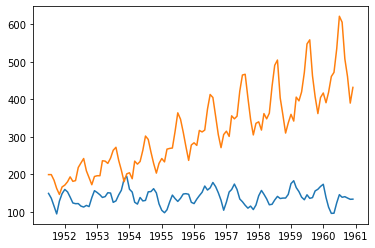

In [179]:
plt.plot(results[['Predictions','Passengers']])

In [180]:
results.corr()

,Passengers,Predictions
Passengers,1.000000,-0.006923
Predictions,-0.006923,1.000000
